In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from utils.dataloader import get_train_test_loaders, get_cv_train_test_loaders
from utils.model import CustomVGG
from utils.helper import train, evaluate, predict_localize
from utils.constants import NEG_CLASS

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


## Parameters

In [2]:
data_folder = "PZT"
subset_name = "PZT"

batch_size = 10
target_train_accuracy = 0.9999
lr = 0.0001
epochs = 10
class_weight = [1, 3] if NEG_CLASS == 1 else [3, 1]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
chkpt_freq = 5

heatmap_thres = 0.7
n_cv_folds = 5

# Data

In [3]:
train_loader, test_loader = get_train_test_loaders(
    root=data_folder, batch_size=batch_size, test_size=0.2, random_state=42,
)

Dataset PZT: N Images = 730, Share of anomalies = 0.500


# Model Training

In [4]:
model = CustomVGG()

class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)
optimizer = optim.Adam(model.parameters(), lr=lr)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
model = train(
    train_loader, model, optimizer, criterion, epochs, device, chkpt_freq, target_train_accuracy
)

Epoch 1/10: Loss = 0.3028, Accuracy = 0.7534
Epoch 2/10: Loss = 0.0882, Accuracy = 0.9328
Epoch 3/10: Loss = 0.0547, Accuracy = 0.9655
Epoch 4/10: Loss = 0.0266, Accuracy = 0.9845
Epoch 5/10: Loss = 0.0132, Accuracy = 0.9966
Epoch 6/10: Loss = 0.0035, Accuracy = 1.0000
Early Stopping


In [6]:
model_path = f"weights/{subset_name}_model.h5"
torch.save(model, model_path)
# model = torch.load(model_path, map_location=device)

# Evaluation

Accuracy: 1.0000
Balanced Accuracy: 1.0000



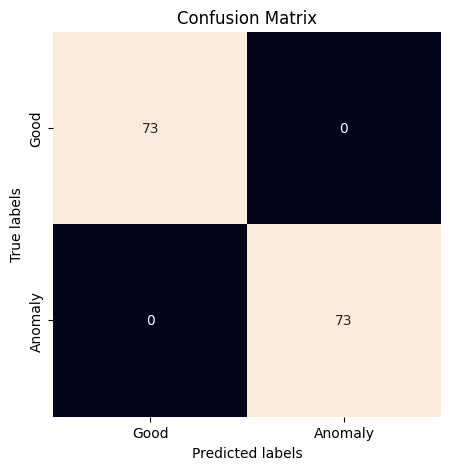

In [7]:
evaluate(model, test_loader, device)

# Cross Validation

Dataset PZT: N Images = 730, Share of anomalies = 0.500
Fold 1/5


C:\Users\HP\AppData\Local\Temp\ipykernel_20048\2988768658.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  war

Epoch 1/10: Loss = 0.1904, Accuracy = 0.8397
Epoch 2/10: Loss = 0.0243, Accuracy = 0.9879
Epoch 3/10: Loss = 0.0159, Accuracy = 0.9914
Epoch 4/10: Loss = 0.0138, Accuracy = 0.9879
Epoch 5/10: Loss = 0.0145, Accuracy = 0.9948
Epoch 6/10: Loss = 0.0117, Accuracy = 0.9879
Epoch 7/10: Loss = 0.0075, Accuracy = 0.9948
Epoch 8/10: Loss = 0.0061, Accuracy = 0.9948
Epoch 9/10: Loss = 0.0060, Accuracy = 0.9966
Epoch 10/10: Loss = 0.0104, Accuracy = 0.9948
Accuracy: 0.5890
Balanced Accuracy: 0.5890



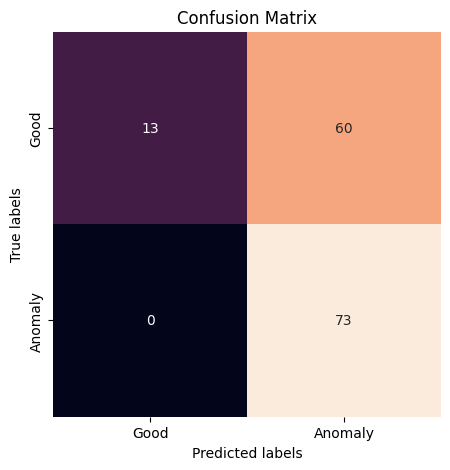

Fold 2/5


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10: Loss = 0.2715, Accuracy = 0.7810
Epoch 2/10: Loss = 0.0848, Accuracy = 0.9293
Epoch 3/10: Loss = 0.0504, Accuracy = 0.9741
Epoch 4/10: Loss = 0.0264, Accuracy = 0.9810
Epoch 5/10: Loss = 0.0150, Accuracy = 0.9948
Epoch 6/10: Loss = 0.0024, Accuracy = 1.0000
Epoch 7/10: Loss = 0.0009, Accuracy = 1.0000
Epoch 8/10: Loss = 0.0006, Accuracy = 1.0000
Epoch 9/10: Loss = 0.0004, Accuracy = 1.0000
Epoch 10/10: Loss = 0.0002, Accuracy = 1.0000
Accuracy: 1.0000
Balanced Accuracy: 1.0000



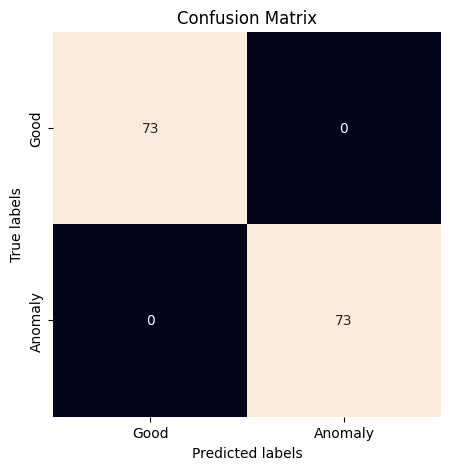

Fold 3/5


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10: Loss = 0.2665, Accuracy = 0.7879
Epoch 2/10: Loss = 0.0823, Accuracy = 0.9431
Epoch 3/10: Loss = 0.0371, Accuracy = 0.9862
Epoch 4/10: Loss = 0.0128, Accuracy = 0.9983
Epoch 5/10: Loss = 0.0027, Accuracy = 1.0000
Epoch 6/10: Loss = 0.0028, Accuracy = 1.0000
Epoch 7/10: Loss = 0.0007, Accuracy = 1.0000
Epoch 8/10: Loss = 0.0004, Accuracy = 1.0000
Epoch 9/10: Loss = 0.0002, Accuracy = 1.0000
Epoch 10/10: Loss = 0.0002, Accuracy = 1.0000
Accuracy: 1.0000
Balanced Accuracy: 1.0000



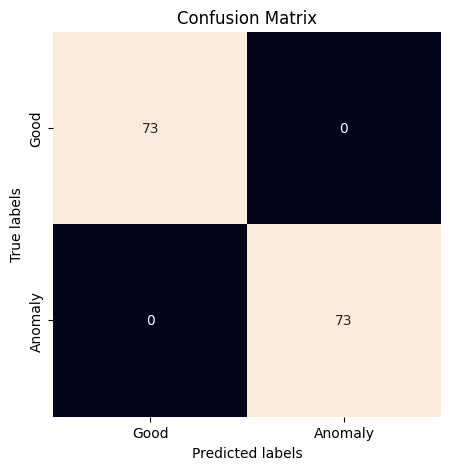

Fold 4/5


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10: Loss = 0.2567, Accuracy = 0.7983
Epoch 2/10: Loss = 0.0787, Accuracy = 0.9362
Epoch 3/10: Loss = 0.0644, Accuracy = 0.9552
Epoch 4/10: Loss = 0.0196, Accuracy = 0.9914
Epoch 5/10: Loss = 0.0109, Accuracy = 0.9948
Epoch 6/10: Loss = 0.0316, Accuracy = 0.9828
Epoch 7/10: Loss = 0.0058, Accuracy = 1.0000
Epoch 8/10: Loss = 0.0013, Accuracy = 1.0000
Epoch 9/10: Loss = 0.0006, Accuracy = 1.0000
Epoch 10/10: Loss = 0.0004, Accuracy = 1.0000
Accuracy: 1.0000
Balanced Accuracy: 1.0000



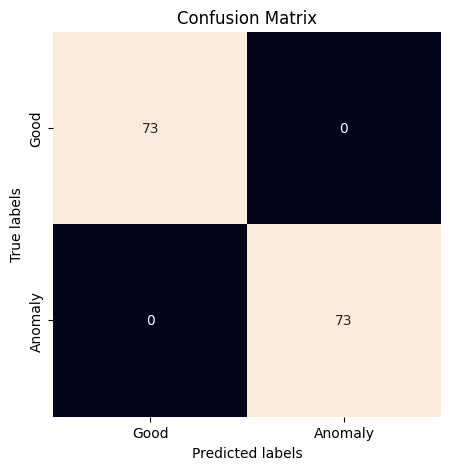

Fold 5/5


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10: Loss = 0.2608, Accuracy = 0.8052
Epoch 2/10: Loss = 0.0700, Accuracy = 0.9414
Epoch 3/10: Loss = 0.0331, Accuracy = 0.9810
Epoch 4/10: Loss = 0.0099, Accuracy = 0.9983
Epoch 5/10: Loss = 0.0030, Accuracy = 1.0000
Epoch 6/10: Loss = 0.0016, Accuracy = 1.0000
Epoch 7/10: Loss = 0.0005, Accuracy = 1.0000
Epoch 8/10: Loss = 0.0003, Accuracy = 1.0000
Epoch 9/10: Loss = 0.0002, Accuracy = 1.0000
Epoch 10/10: Loss = 0.0002, Accuracy = 1.0000
Accuracy: 0.9589
Balanced Accuracy: 0.9589



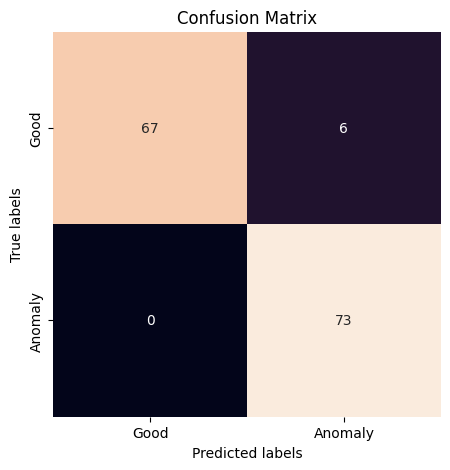

In [8]:
cv_folds = get_cv_train_test_loaders(
    root=data_folder,
    batch_size=batch_size,
    n_folds=n_cv_folds,
)

class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)

for i, (train_loader, test_loader) in enumerate(cv_folds):
    print(f"Fold {i+1}/{n_cv_folds}")
    model = CustomVGG()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model = train(train_loader, model, optimizer, criterion, epochs, device, 100000)
    evaluate(model, test_loader, device)

# Visualization

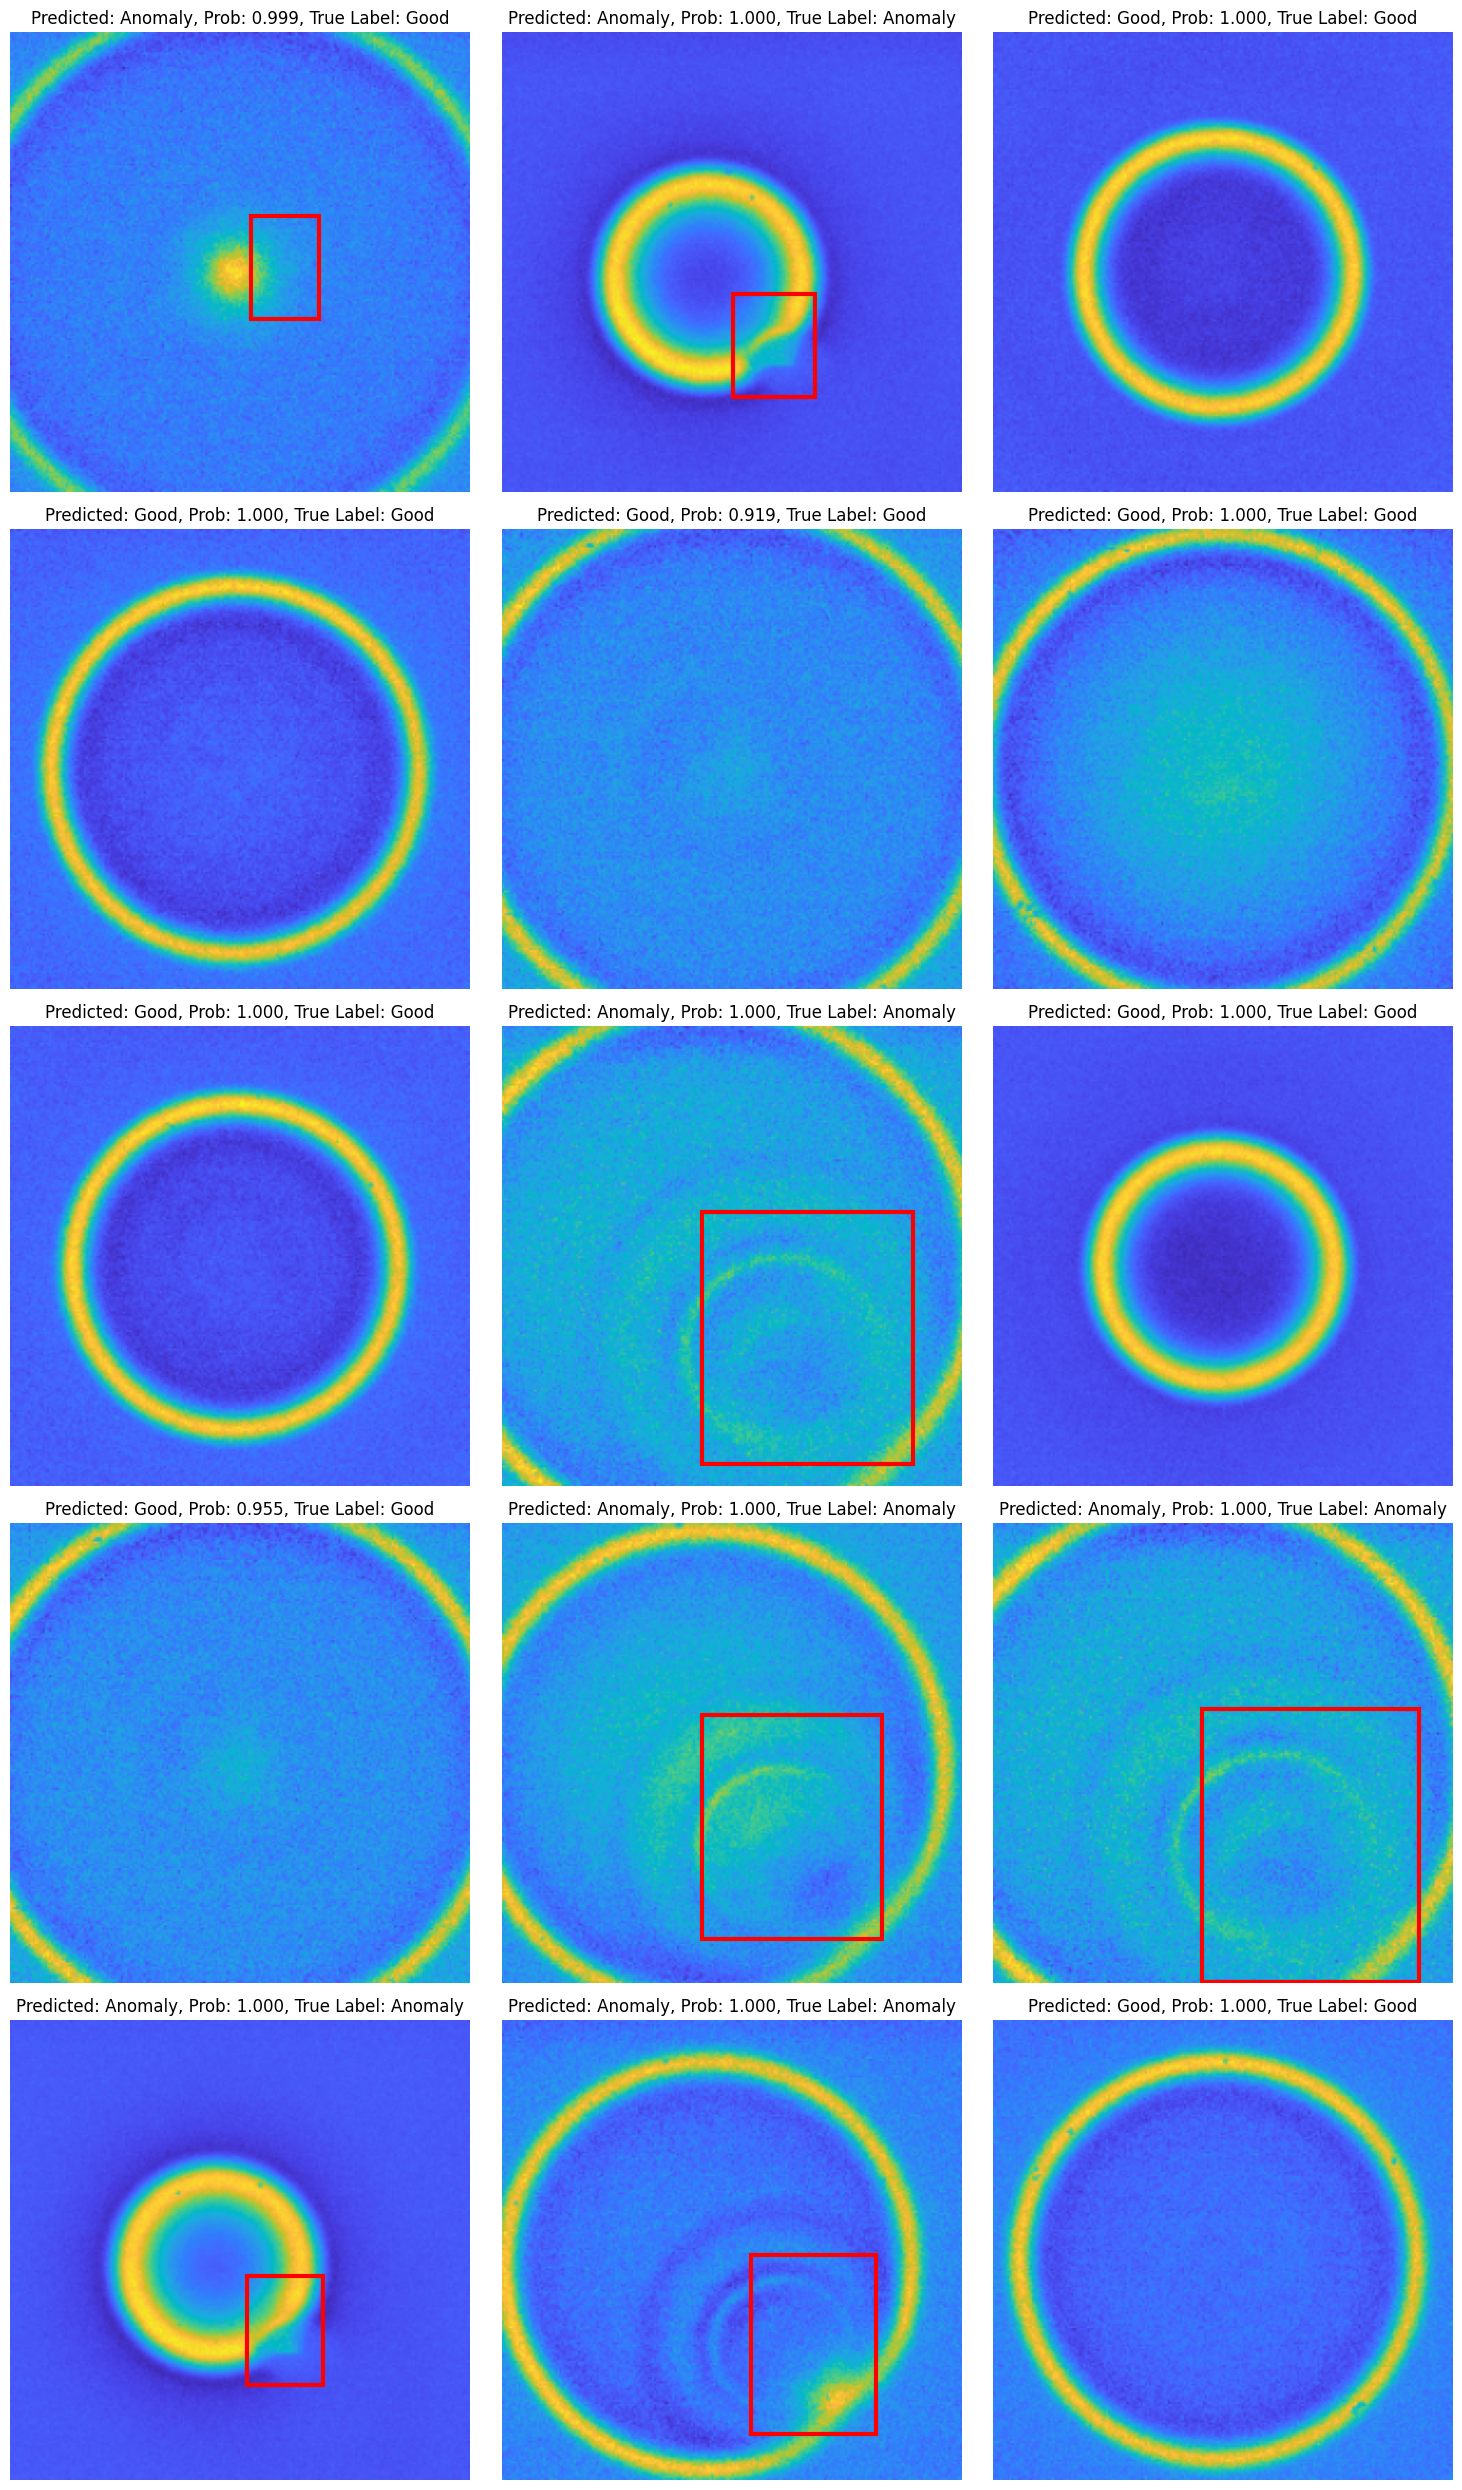

In [9]:
predict_localize(
    model, test_loader, device, thres=heatmap_thres, n_samples=15, show_heatmap=False
)